# Home Loan EDA

In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy


## Data Collection and Preparation

In [2]:
train_url = r'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'
test_url = r'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv'



In [3]:
test_data = pd.read_csv(test_url, sep=",")
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [4]:
train_data = pd.read_csv(train_url, sep=",")
train_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
train_data.shape

(614, 13)

In [6]:
test_data.shape

(367, 12)

In [7]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test_data.columns
#Loan_Status is missing in the test data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
df = train_data.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Correcting datatypes
df["Dependents"] = df["Dependents"].replace("3+", 3)

df= df.astype({"Dependents":"float64", "ApplicantIncome":"float64"})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


#### Hanlding missing values and duplicates

In [13]:
#Checking missing values
print("Missing Values")
missing_values = df.isnull().sum()
if missing_values.sum()>0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values")

#Checking for duplicates
print("\nDuplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicated Rows: {duplicates}")

if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(duplicates))*100:.2f}%")
else:
    print("There are no duplicate rows.")

Missing Values
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Duplicate Rows:
Number of duplicated Rows: 0
There are no duplicate rows.


In [14]:
#Handling missing values
df.dropna(subset=["LoanAmount"], inplace=True)

In [15]:
df.dropna(subset=["Loan_Amount_Term"], inplace=True)

In [16]:
#Handling missing values
df["Gender"] = df['Gender'].fillna(df["Gender"].mode().iloc[0])
df["Married"] = df['Married'].fillna(df["Married"].mode().iloc[0])

df["Dependents"] = df['Dependents'].fillna(df["Dependents"].median())
df["Self_Employed"] = df['Self_Employed'].fillna(df["Self_Employed"].mode().iloc[0])
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].median())


In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Handling Outliers

## Exploratory Data Analysis

#### Descriptive Statistics

In [18]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_features = num_features.drop("Credit_History")
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,578.0,0.756055,1.011720,0.0,0.00,0.0,2.0,3.0
ApplicantIncome,578.0,5435.138408,6229.382997,150.0,2890.25,3812.5,5795.0,81000.0
CoapplicantIncome,578.0,1640.482561,2993.270767,0.0,0.00,1211.5,2281.0,41667.0
LoanAmount,578.0,147.143599,86.342523,9.0,100.00,128.0,168.0,700.0
Loan_Amount_Term,578.0,342.145329,65.442101,12.0,360.00,360.0,360.0,480.0


### **Univariate Analysis**

In [19]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """

    print(f"\nFeature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    #Historgram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde= True, bins=30, color='purple')
    plt.title(f"\nDistribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='purple')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")



Feature: Dependents
       Dependents
count  578.000000
mean     0.756055
std      1.011720
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      3.000000

Skewness: 0.987
Kurtosis: -0.406


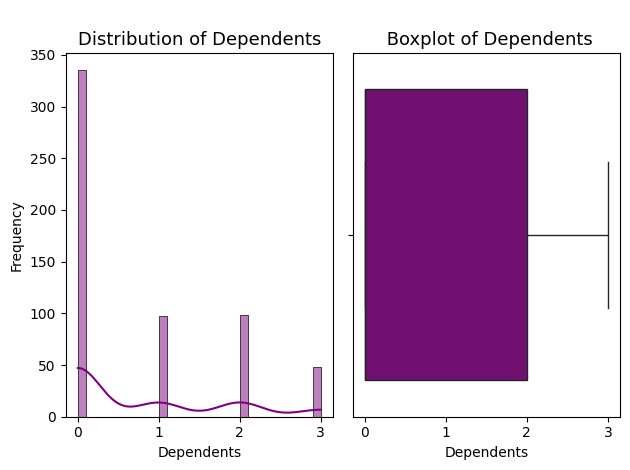

Dependents is moderately skewed.

Feature: ApplicantIncome
       ApplicantIncome
count       578.000000
mean       5435.138408
std        6229.382997
min         150.000000
25%        2890.250000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.511
Kurtosis: 59.271


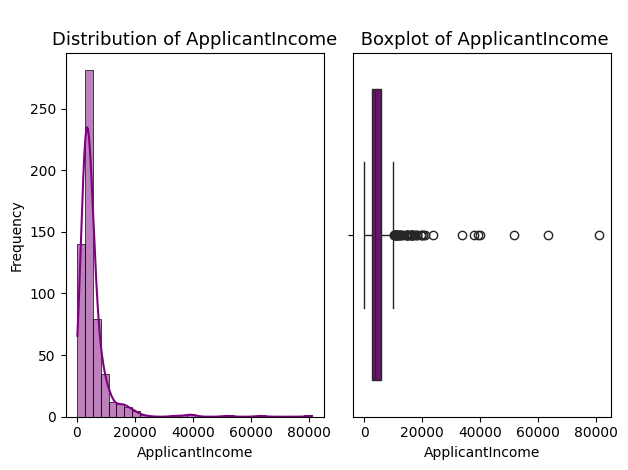


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.

Feature: CoapplicantIncome
       CoapplicantIncome
count         578.000000
mean         1640.482561
std          2993.270767
min             0.000000
25%             0.000000
50%          1211.500000
75%          2281.000000
max         41667.000000

Skewness: 7.418
Kurtosis: 82.204


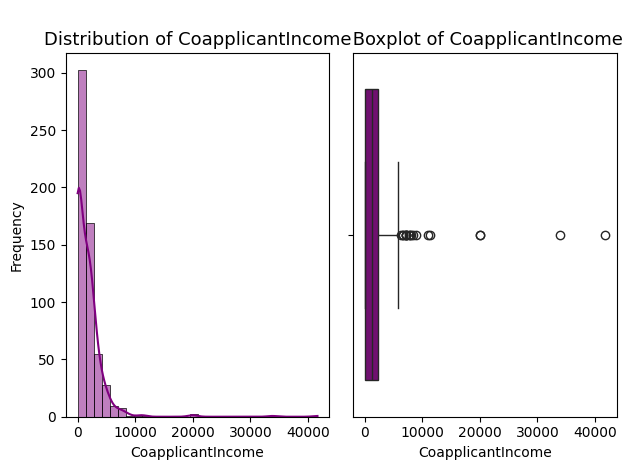


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.

Feature: LoanAmount
       LoanAmount
count  578.000000
mean   147.143599
std     86.342523
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    700.000000

Skewness: 2.650
Kurtosis: 10.162


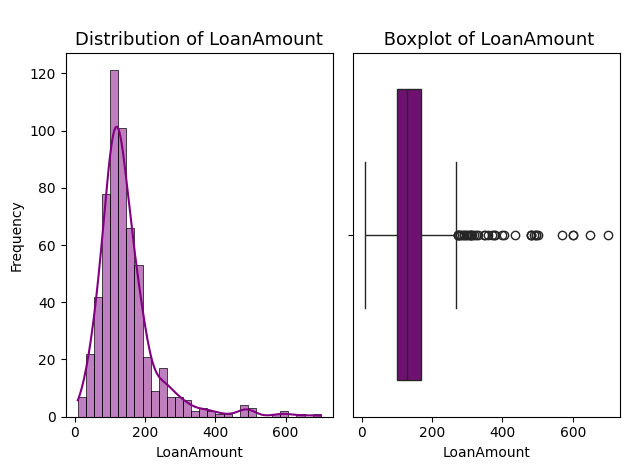


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.

Feature: Loan_Amount_Term
       Loan_Amount_Term
count        578.000000
mean         342.145329
std           65.442101
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.365
Kurtosis: 6.729


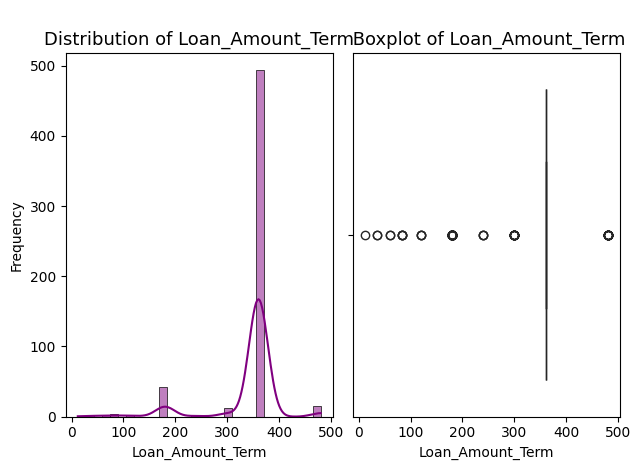


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.


In [20]:
for col in num_features:
    univariate_numerical_eda(df, col)

In [21]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = list(categorical_features)
print(categorical_features)


# #Appending credit history since it is a categorical data
categorical_features.append('Credit_History')
df[categorical_features].info()

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 613
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         578 non-null    object 
 1   Gender          578 non-null    object 
 2   Married         578 non-null    object 
 3   Education       578 non-null    object 
 4   Self_Employed   578 non-null    object 
 5   Property_Area   578 non-null    object 
 6   Loan_Status     578 non-null    object 
 7   Credit_History  578 non-null    float64
dtypes: float64(1), object(7)
memory usage: 40.6+ KB


In [22]:

def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

Feature: Loan_ID
          Count  Percentage
Loan_ID                    
LP001003      1        0.17
LP001005      1        0.17
LP001006      1        0.17
LP001008      1        0.17
LP001011      1        0.17
...         ...         ...
LP002978      1        0.17
LP002979      1        0.17
LP002983      1        0.17
LP002984      1        0.17
LP002990      1        0.17

[578 rows x 2 columns]



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


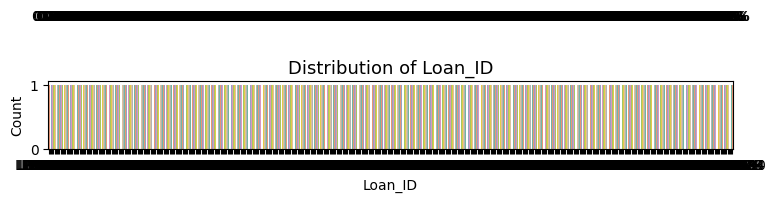

Feature: Gender
        Count  Percentage
Gender                   
Male      472       81.66
Female    106       18.34



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


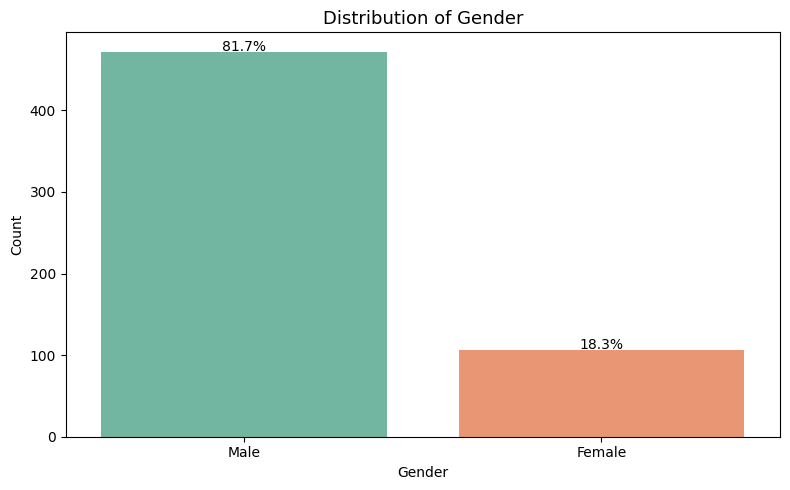

Feature: Married
         Count  Percentage
Married                   
Yes        377       65.22
No         201       34.78



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


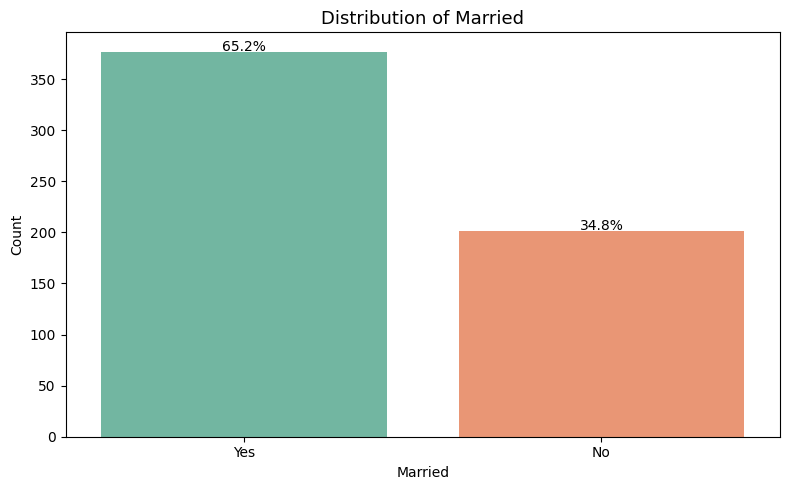

Feature: Education
              Count  Percentage
Education                      
Graduate        457       79.07
Not Graduate    121       20.93



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


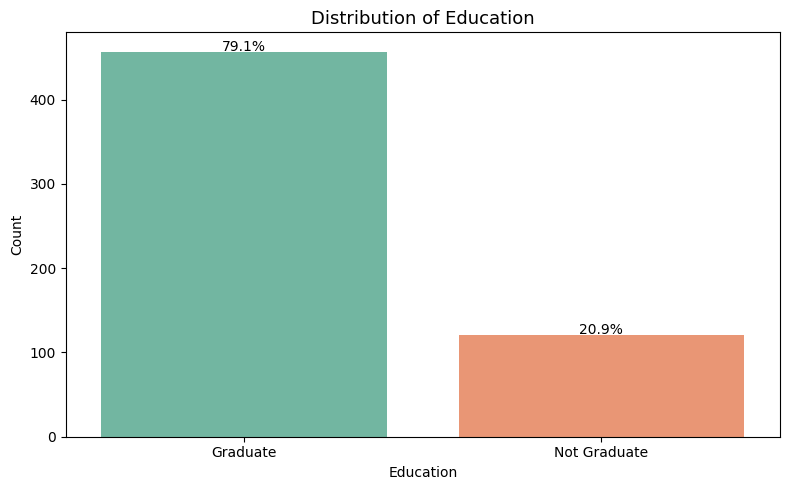

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               501       86.68
Yes               77       13.32



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


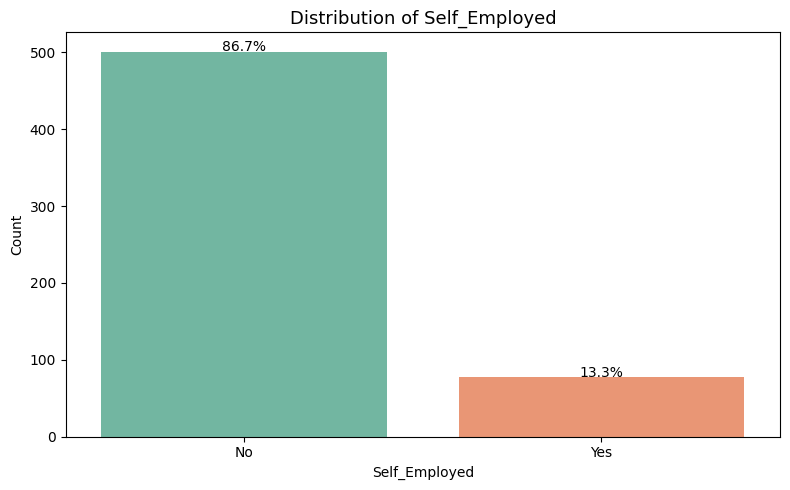

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        225       38.93
Urban            184       31.83
Rural            169       29.24



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


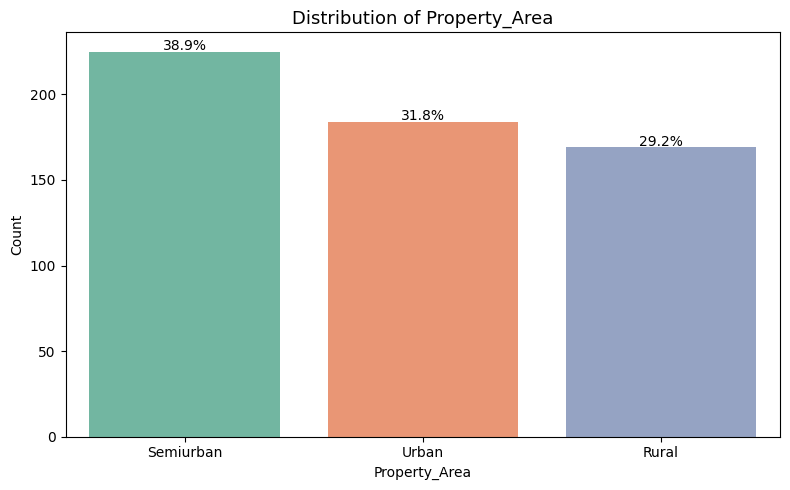

Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              403       69.72
N              175       30.28



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


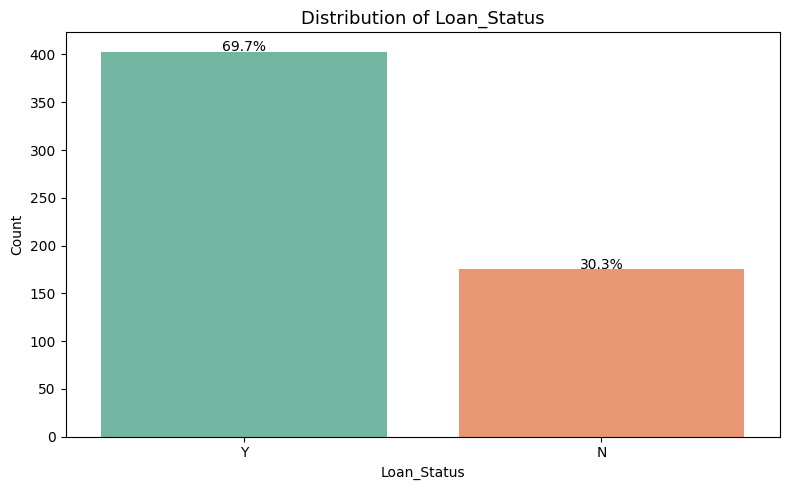

Feature: Credit_History
                Count  Percentage
Credit_History                   
1.0               499       86.33
0.0                79       13.67



C:\Users\ncc333\AppData\Local\Temp\ipykernel_13308\3417124177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


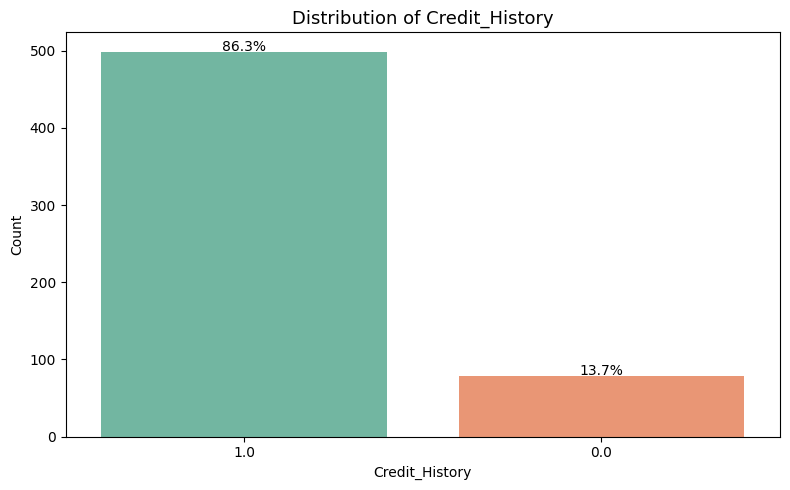

In [23]:
for col in categorical_features:
    univariate_categorical_eda(df, col)

### **Bivariate Analysis**

In [24]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_features = num_features.drop("Credit_History")

#Converting to dataframe
num_features = pd.DataFrame(df[num_features])
num_features.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,1.0,4583.0,1508.0,128.0,360.0
2,0.0,3000.0,0.0,66.0,360.0


#### Numeric to Numeric

In [25]:
df['Loan_Status'] = (df["Loan_Status"] == 'Y').astype(int)

In [29]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    #Keeping only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    # numeric_df = numeric_df.drop('Credit_History')
    
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
    
    #Computing correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name = 'corr').T #Shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt = ".3f",
        cmap="coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws = {'orientation': 'vertical', 'shrink': 0.7}
    )

    plt.xticks(rotation= 45, ha = 'right')
    plt.yticks([0], [target_col], rotation= 0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()

    #Return sorted correlations for downstream us
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

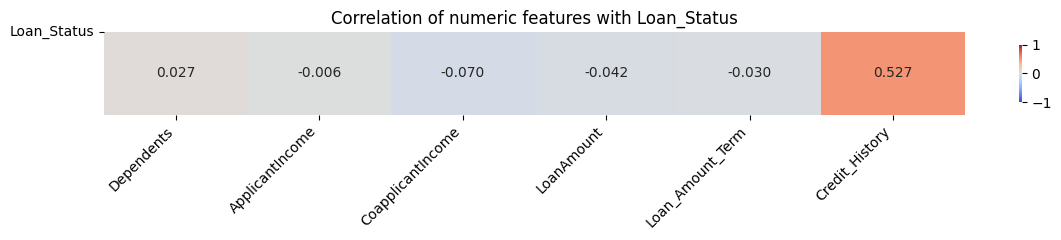

Credit_History       0.527071
CoapplicantIncome   -0.070154
LoanAmount          -0.041898
Loan_Amount_Term    -0.029979
Dependents           0.027230
ApplicantIncome     -0.005665
dtype: float64


In [31]:
corr_series = correlation_with_target(df, 'Loan_Status', figsize=(12, 2.5))
print(corr_series)

In [34]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """


    #Calculating correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    #Creating plot
    plt.figure(figsize=(8,5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    #Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

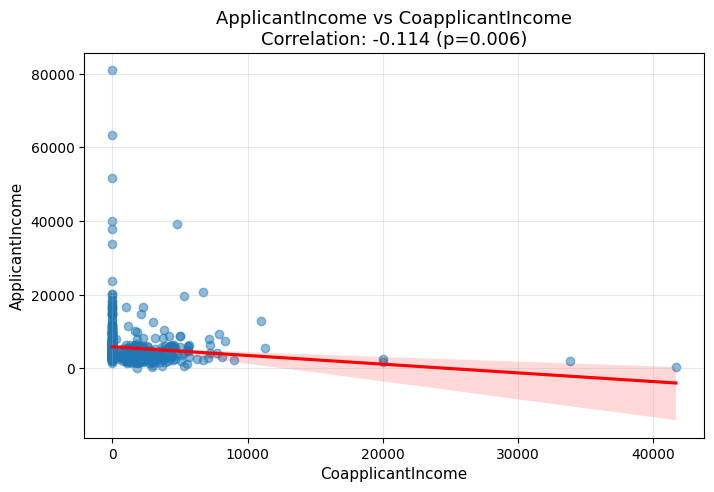

In [38]:
numeric_bivariate_plot(df,  'CoapplicantIncome','ApplicantIncome')

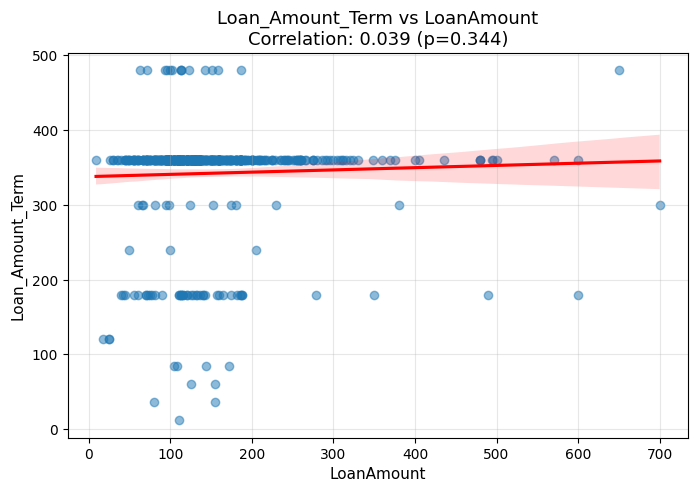

In [40]:
numeric_bivariate_plot(df,  'LoanAmount','Loan_Amount_Term')

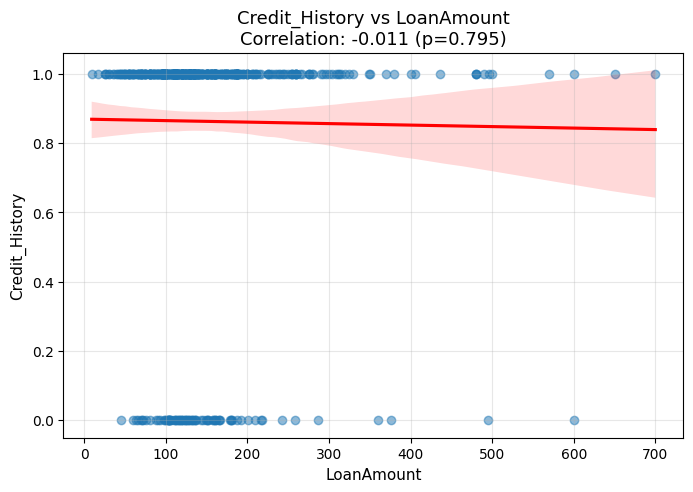

In [41]:
numeric_bivariate_plot(df,  'LoanAmount','Credit_History')